# Sales Predictions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


df = pd.read_csv("data/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
# datos nulos
dct_nulos = {col:len(df[df[col].isnull()]) for col in df.columns}
dct_nulos

{'Item_Identifier': 0,
 'Item_Weight': 1463,
 'Item_Fat_Content': 0,
 'Item_Visibility': 0,
 'Item_Type': 0,
 'Item_MRP': 0,
 'Outlet_Identifier': 0,
 'Outlet_Establishment_Year': 0,
 'Outlet_Size': 2410,
 'Outlet_Location_Type': 0,
 'Outlet_Type': 0,
 'Item_Outlet_Sales': 0}

In [3]:
# estadisticos
df.describe(include ='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [4]:
# limpieza de datos
df = df[df.notnull().all(axis=1)]

In [5]:
# datos nulos
dct_nulos = {col:len(df[df[col].isnull()]) for col in df.columns}
dct_nulos

{'Item_Identifier': 0,
 'Item_Weight': 0,
 'Item_Fat_Content': 0,
 'Item_Visibility': 0,
 'Item_Type': 0,
 'Item_MRP': 0,
 'Outlet_Identifier': 0,
 'Outlet_Establishment_Year': 0,
 'Outlet_Size': 0,
 'Outlet_Location_Type': 0,
 'Outlet_Type': 0,
 'Item_Outlet_Sales': 0}

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# variables

col_numericas = [
    'Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales'
]

col_categoricas = [x for x in df.columns if (x not in col_numericas) and (x not in ["Item_Identifier"])]

variables numericas
Item_Fat_Content


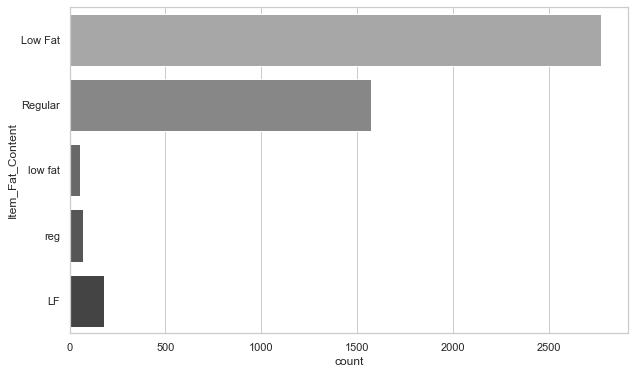

Item_Type


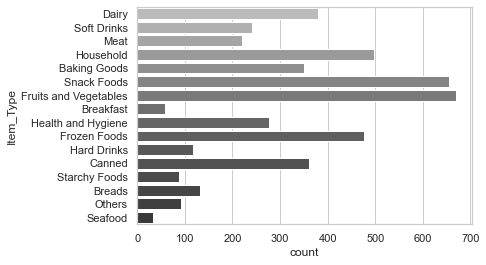

Outlet_Identifier


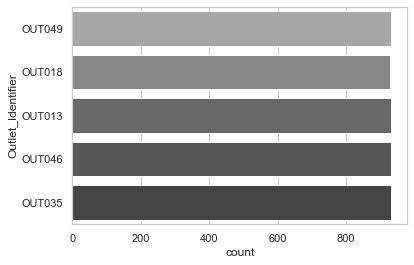

Outlet_Size


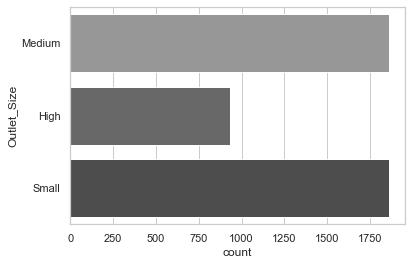

Outlet_Location_Type


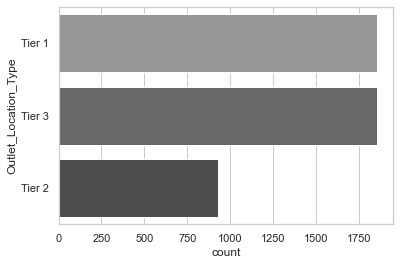

Outlet_Type


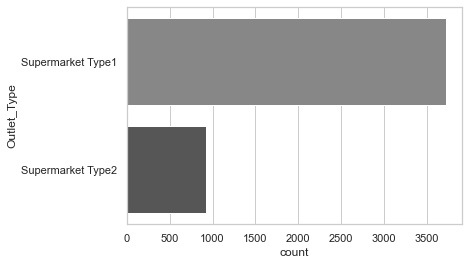

In [8]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

print("variables numericas")
for col in col_categoricas:
    print(col)
    sns.countplot(y=col, data=df, palette='Greys_d')
    plt.show()

variables numericas
Item_Weight


C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


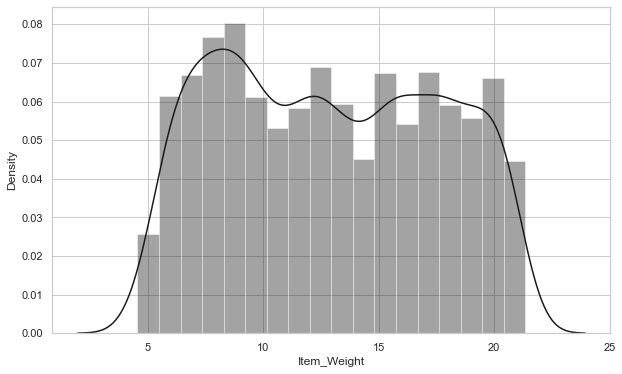

Item_Visibility


C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


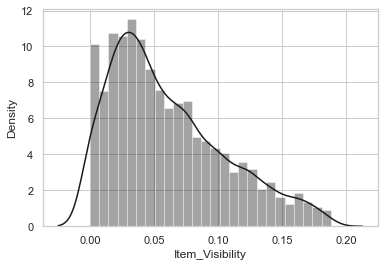

C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Item_MRP


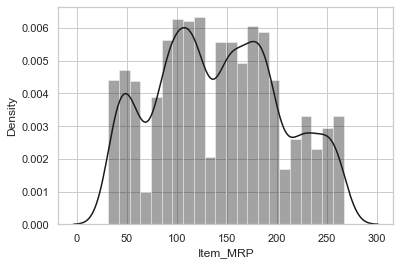

C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Outlet_Establishment_Year


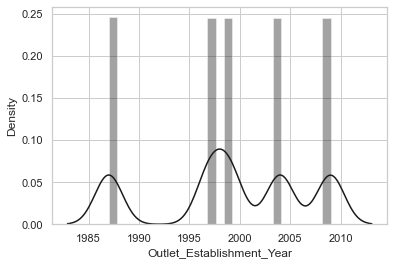

C:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\basic-tools-a_KeXlN7-py3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Item_Outlet_Sales


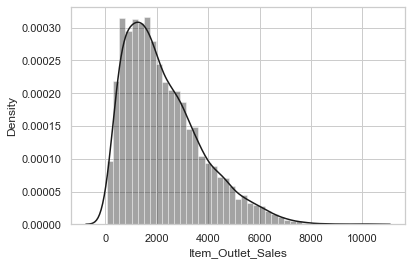

In [9]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

print("variables numericas")
for col in col_numericas:
    print(col)
    sns.distplot(df[col],color = 'k')
    plt.show()

box-plot
Item_Weight


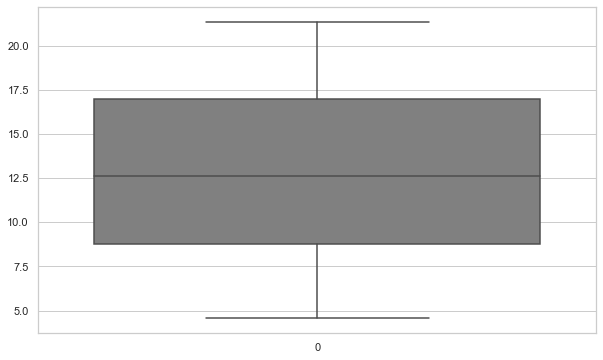

Item_Visibility


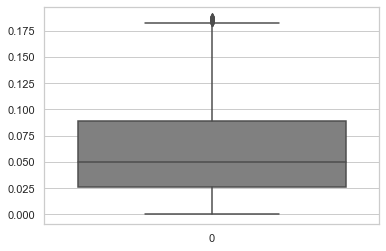

Item_MRP


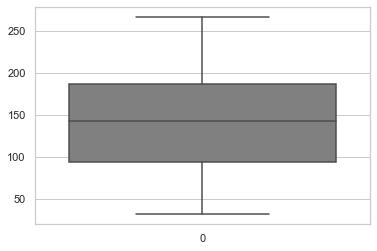

Outlet_Establishment_Year


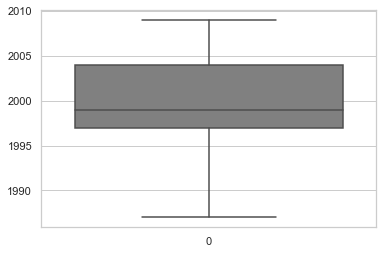

Item_Outlet_Sales


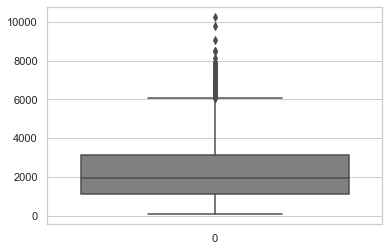

In [30]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

print("box-plot")
for col in col_numericas:
    print(col)
    sns.boxplot(data=df[col],color = 'gray')
    plt.show()

correlacion


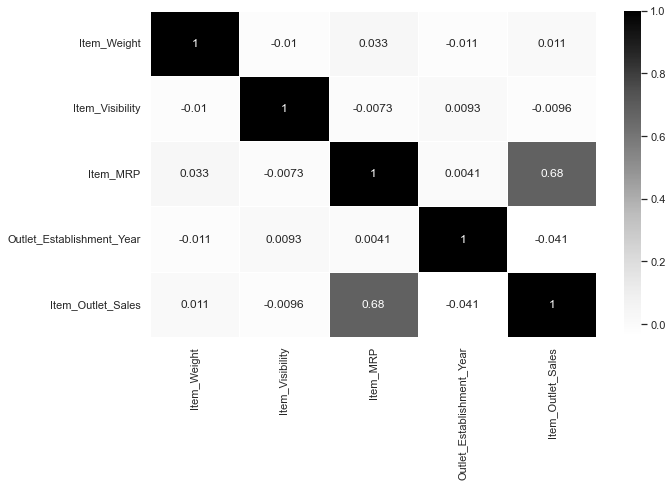

In [33]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

print("correlacion")
sns.heatmap(
    df.corr(),
    linewidths=.5,
    annot=True,
     cmap='Greys'
)

plt.show()

In [12]:
# variables categoricas a variables numericas
new_df = df.copy().set_index("Item_Identifier")

for col in col_categoricas:
    new_df[col] = LabelEncoder().fit_transform(new_df[col])

In [13]:
# modelo (regresion lineal)
# > nota: esta forma de trabajo es similar para cualquier modelo de regresion lineal

X = new_df.drop('Item_Outlet_Sales',axis=1)
y= new_df['Item_Outlet_Sales']

# ajustar el modelo
model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X, y) # ajustando el modelo

# prediciones
Y_predict = model_rl.predict(X)

In [14]:
# error
def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)

In [15]:
# metricas
valor_mae = mae(y,Y_predict)
valor_mse = mse(y,Y_predict)
valor_rmse = rmse(y,Y_predict)


print(f"mae: {valor_mae}") 
print(f"mse: {valor_mse}") 
print(f"rmse: {valor_rmse}")

mae: 803.4596
mse: 1185321.2398
rmse: 1088.7246


In [23]:
# variables más importante

df_importancia= pd.DataFrame({
    'nombres' : X.columns,
    'valores' : model_rl.coef_,
}).sort_values('valores')

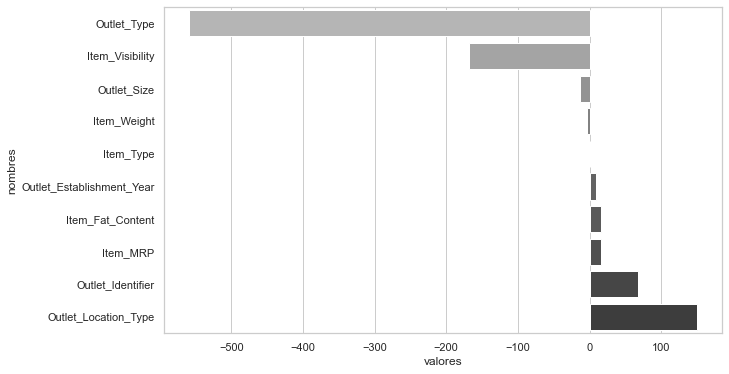

In [27]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_importancia, x="valores", y="nombres",palette='Greys_d')
plt.show()